In [21]:
import numpy as np
import matplotlib.pyplot as plt
from data_plotters_animators import *
from scipy.constants import c, pi


In [22]:
class Sim_wind(object):
    def __init__(self,fv,t):
        self.fv = fv
        self.t = t

In [23]:
file_path = 'output_dump/output0/data'
#file_path = 'output_dump/output0/data/portA/'
#file_path = 'output_dump/output0/data/portB/'

In [24]:
value = '/992'

In [25]:
D = read_variables(value, file_path)

In [34]:
nm, t, fv, power_watts,which, u,U = D['nm'], D['t'], D['fv'],D['power_watts'], D['which'], D['u'],D['U']
sim_wind = Sim_wind(fv,t)

KeyError: 'U'

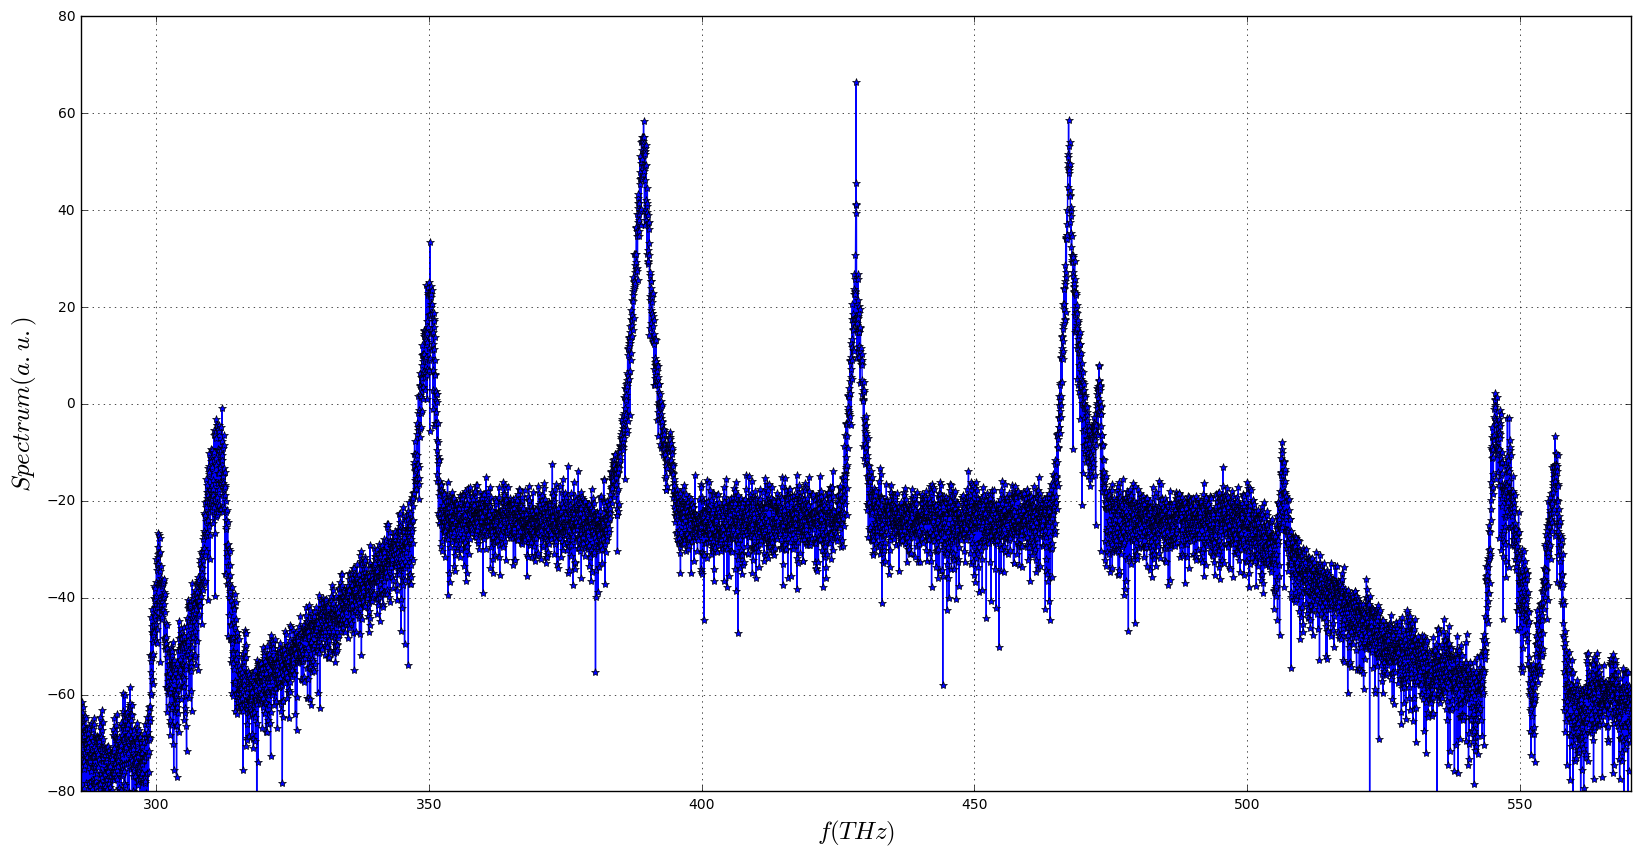

In [27]:
fig = plt.figure(figsize=(20.0, 10.0))
for ii in range(nm):
    plt.plot(sim_wind.fv,np.real(power_watts[:,ii,which]),'-*',label='mode'+str(ii))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlabel(r'$f (THz)$',fontsize=18)
plt.ylabel(r'$Spectrum (a.u.)$',fontsize=18)
plt.xlim([np.min(sim_wind.fv),np.max(sim_wind.fv)])
plt.ylim([-80,80])
plt.grid()
plt.show()

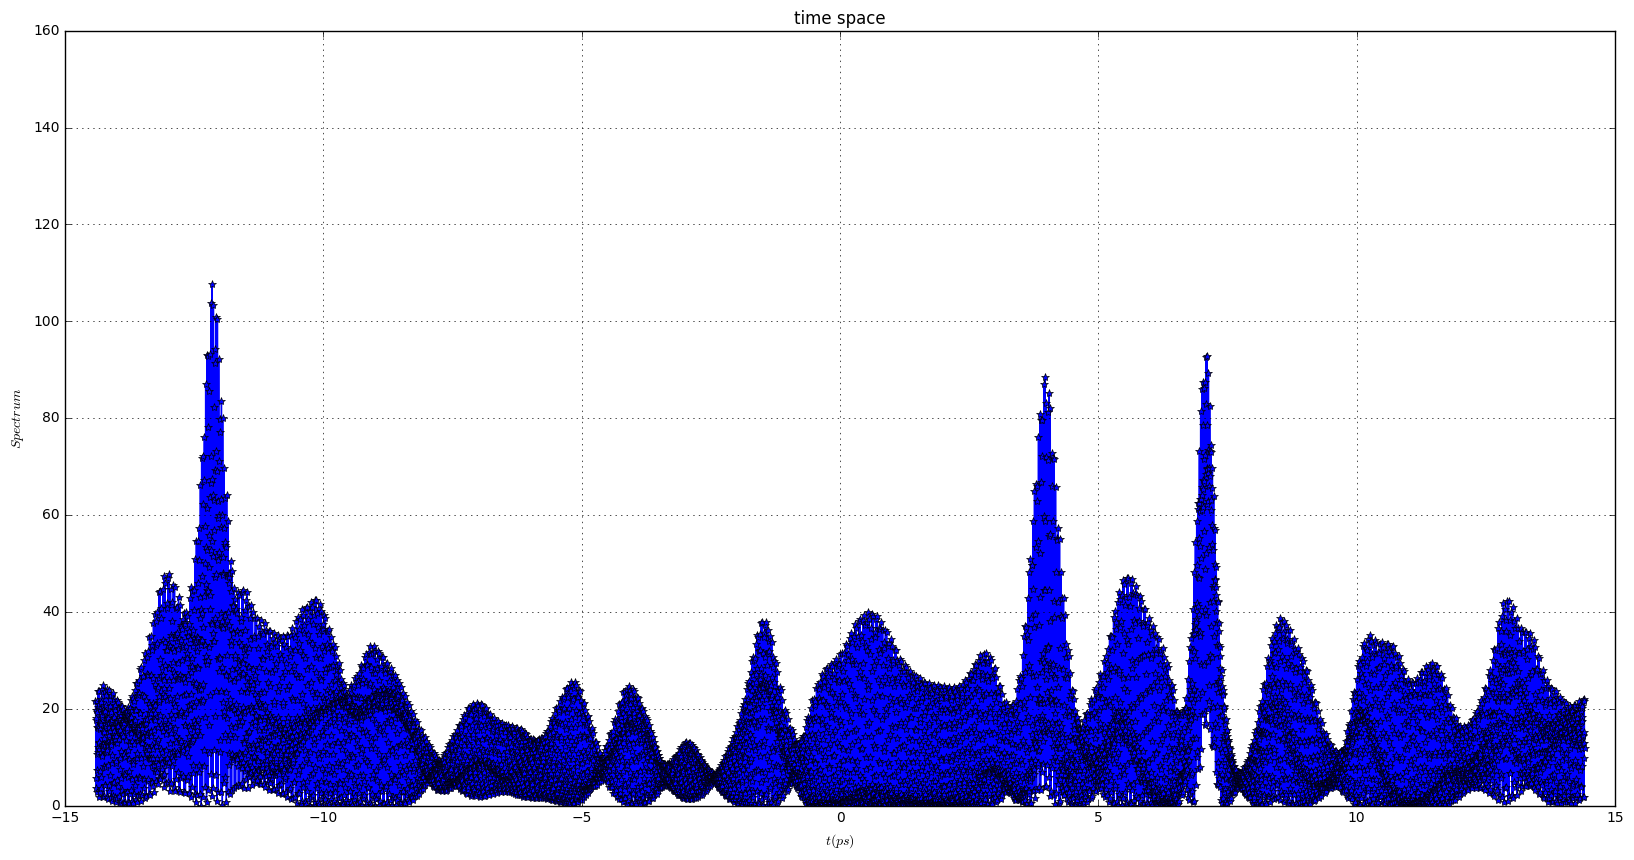

In [28]:
fig = plt.figure(figsize=(20.0, 10.0))
for ii in range(nm):
    plt.plot(sim_wind.t,np.abs(u[:,ii,which])**2,'*-',label='mode'+str(ii))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title("time space")
plt.grid()
plt.xlabel(r'$t(ps)$')
plt.ylabel(r'$Spectrum$')
plt.ylim([0,160])
plt.show()